In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="Set2")

In [2]:
df = pd.read_excel("data.xlsx", sheet_name="Online Retail")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
customer_count = df.CustomerID.nunique()
customer_count

4372

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["Total price"] = df["Quantity"] * df["UnitPrice"]

In [8]:
df.drop(columns=["Quantity", "UnitPrice"], inplace=True)

In [9]:
retail_by_customer = df.groupby("CustomerID")["Total price"].sum().reset_index()
retail_by_customer.sort_values("Total price", ascending=False)

,CustomerID,Total price
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


In [10]:
NO_purchases_by_customer = df.groupby("CustomerID")["InvoiceNo"].count().reset_index()
NO_purchases_by_customer.rename(columns={"InvoiceNo": "Purchase count"}, inplace=True)
NO_purchases_by_customer.sort_values("Purchase count", ascending=False)

,CustomerID,Purchase count
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
...,...,...
1318,14119.0,1
1046,13747.0,1
2400,15590.0,1
2379,15562.0,1


In [11]:
max_purchase_date = df["InvoiceDate"].max()

last_purchase_df = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()

last_purchase_df["Days since last purchase"] = (
    max_purchase_date - last_purchase_df["InvoiceDate"]
).dt.days

customer_last_purchase_df = last_purchase_df[["CustomerID", "Days since last purchase"]]
customer_last_purchase_df.sort_values("Days since last purchase", ascending=True)

,CustomerID,Days since last purchase
3784,17491.0,0
3392,16933.0,0
3113,16558.0,0
524,13026.0,0
3691,17364.0,0
...,...,...
4212,18074.0,373
359,12791.0,373
4096,17908.0,373
3129,16583.0,373


In [12]:
customer_df = retail_by_customer.merge(NO_purchases_by_customer, on="CustomerID").merge(
    customer_last_purchase_df, on="CustomerID"
)
customer_df.sort_values("Purchase count", ascending=False)

,CustomerID,Total price,Purchase count,Days since last purchase
4042,17841.0,40340.78,7983,1
1895,14911.0,132572.62,5903,0
1300,14096.0,57120.91,5128,3
330,12748.0,29072.10,4642,0
1674,14606.0,11713.85,2782,0
...,...,...,...,...
1318,14119.0,-19.90,1,353
1046,13747.0,79.60,1,373
2400,15590.0,-30.19,1,288
2379,15562.0,134.55,1,351


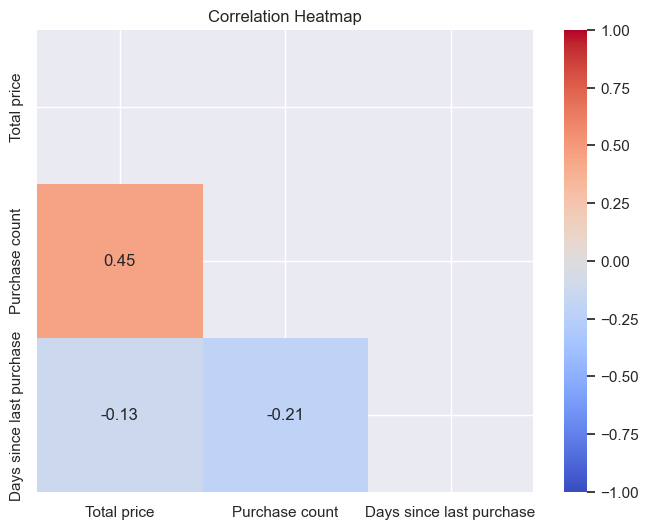

In [13]:
correlation_matrix = customer_df[
    ["Total price", "Purchase count", "Days since last purchase"]
].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Heatmap")

plt.show()

<Axes: >

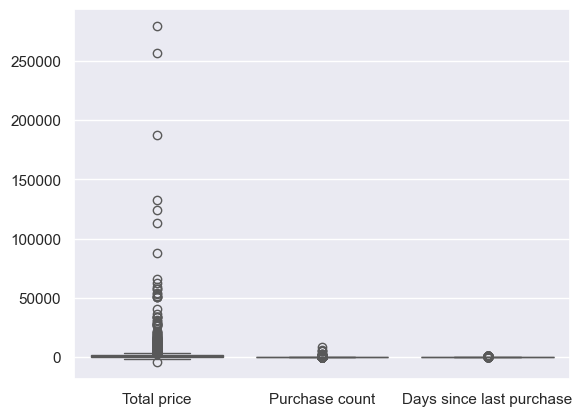

In [14]:
sns.boxplot(
    data=customer_df[["Total price", "Purchase count", "Days since last purchase"]]
)

In [15]:
def remove_outliers(df: pd.DataFrame, column_names: list) -> pd.DataFrame:
    """Remove outliers from a DataFrame column using the IQR method.

    Args:
        df (pd.DataFrame): dataframe to be reduced
        column_name (List): column names containing the outliers

    Returns:
        pd.DataFrame: DataFrame with outliers removed
    """

    df_no_outliers = df.copy()

    for column_name in column_names:
        assert (
            column_name in df.columns
        ), f"Column '{column_name}' does not exist in the DataFrame."

        assert pd.api.types.is_numeric_dtype(
            df[column_name]
        ), f"Column '{column_name}' must be numerical"

        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers = df_no_outliers[
            (df_no_outliers[column_name] >= lower_bound)
            & (df_no_outliers[column_name] <= upper_bound)
        ]

    return df_no_outliers

In [16]:
def distribution_graphs(
    df: pd.DataFrame, columns: list, graph_type: str = "hist"
) -> plt.figure:
    """
    Plot distribution graphs for specified columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to plot.
    - graph_type (str, optional): The type of graph to plot. Default is "hist".
        Options: "hist" for histograms, "box" for boxplots.

    Returns:
    - plt.figure: Matplotlib figure object.

    Raises:
    - ValueError: If an invalid value is provided for graph_type.
    """
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3

    _, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if graph_type == "hist":
            sns.histplot(
                data=df,
                x=column,
                ax=axes[i],
            )
        elif graph_type == "box":
            sns.boxplot(
                y=df[column],
                ax=axes[i],
            )
            axes[i].set_xlabel(column)
            axes[i].set_ylabel("")
        else:
            raise ValueError("Invalid value for graph_type. Use 'hist' or 'box'.")

    plt.tight_layout()
    plt.show()

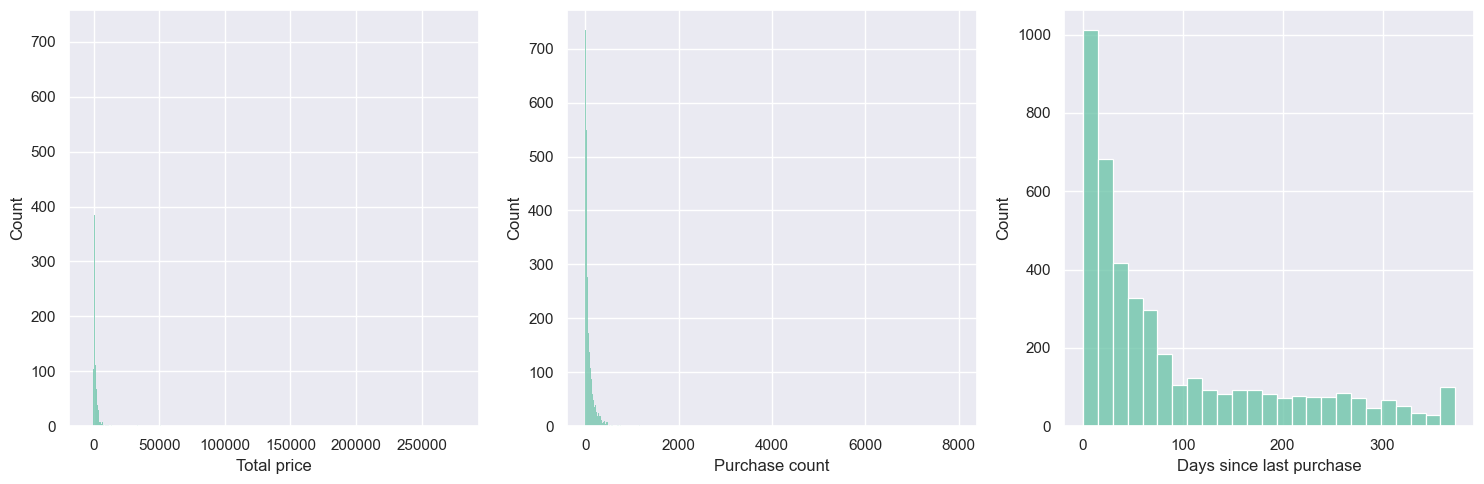

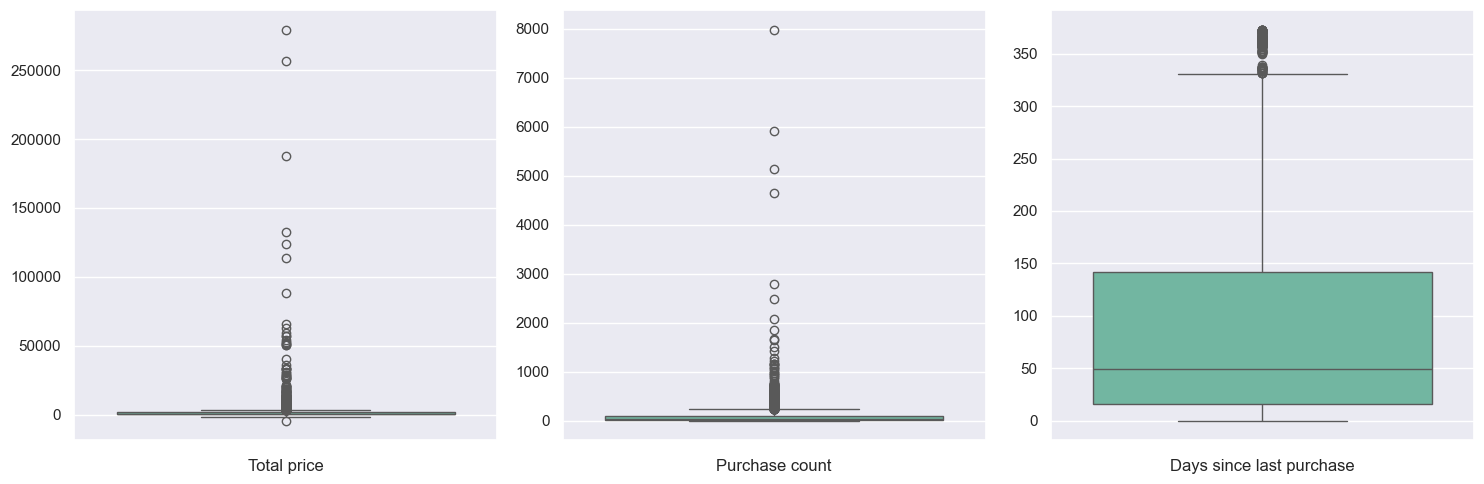

In [17]:
distribution_graphs(
    customer_df,
    ["Total price", "Purchase count", "Days since last purchase"],
    graph_type="hist",
)

distribution_graphs(
    customer_df,
    ["Total price", "Purchase count", "Days since last purchase"],
    graph_type="box",
)

In [18]:
df_no_outliers = remove_outliers(
    customer_df, ["Total price", "Purchase count", "Days since last purchase"]
)

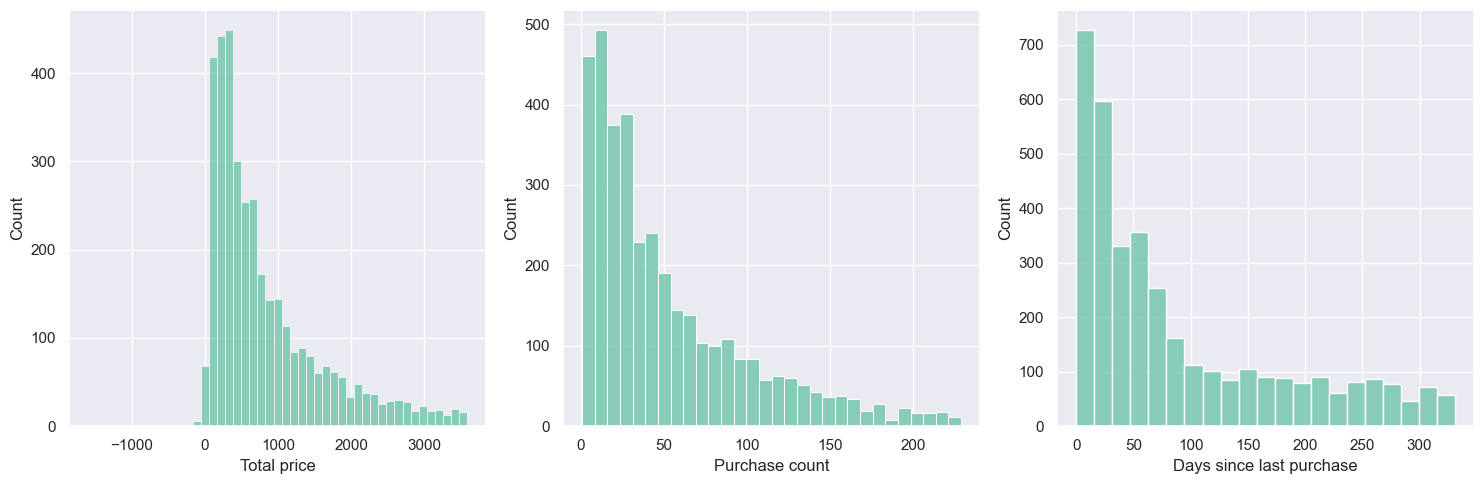

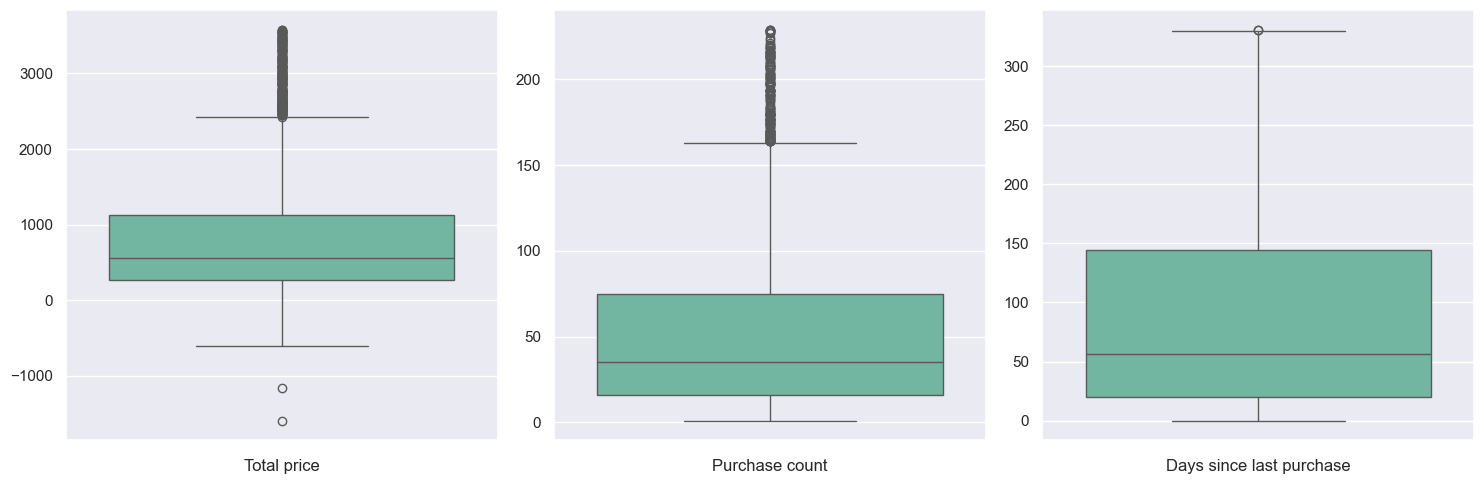

In [19]:
distribution_graphs(
    df_no_outliers,
    ["Total price", "Purchase count", "Days since last purchase"],
    graph_type="hist",
)

distribution_graphs(
    df_no_outliers,
    ["Total price", "Purchase count", "Days since last purchase"],
    graph_type="box",
)